In [7]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Visualization
<br>
Now we have the data ready and can do some visualization on different columns <br>
to make everything clear and know what to do next. <br>
<br>
Also we have the problem of NaN's and will know better <br>
how to fill them after seeing some visual results. <br>
<br>

In [2]:
########################
##    Reading data    ##
########################

data = pd.read_pickle('total_data.pkl')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948193 entries, 0 to 61705
Data columns (total 15 columns):
BEGIN_LAT            948193 non-null float64
BEGIN_LON            948193 non-null float64
BEGIN_YEARMONTH      948193 non-null int64
STATE                948193 non-null object
INJURIES_DIRECT      948193 non-null int64
INJURIES_INDIRECT    948193 non-null int64
DEATHS_DIRECT        948193 non-null int64
DEATHS_INDIRECT      948193 non-null int64
DAMAGE_PROPERTY      688183 non-null object
EVENT_TYPE           948193 non-null object
DAMAGE_CROPS         617619 non-null object
MAGNITUDE            774587 non-null float64
MAGNITUDE_TYPE       282121 non-null object
FLOOD_CAUSE          76249 non-null object
DATE                 948193 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 115.7+ MB
None


,BEGIN_LAT,BEGIN_LON,BEGIN_YEARMONTH,STATE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,EVENT_TYPE,DAMAGE_CROPS,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,DATE
0,35.12,-99.20,195004,OKLAHOMA,0,0,0,0,250K,Tornado,0,0.0,NaN,NaN,1950-04-13
1,31.90,-98.60,195004,TEXAS,0,0,0,0,25K,Tornado,0,0.0,NaN,NaN,1950-04-22
2,40.58,-75.70,195007,PENNSYLVANIA,2,0,0,0,25K,Tornado,0,0.0,NaN,NaN,1950-07-11
3,40.60,-76.75,195007,PENNSYLVANIA,0,0,0,0,2.5K,Tornado,0,0.0,NaN,NaN,1950-07-10
4,41.63,-79.68,195007,PENNSYLVANIA,0,0,0,0,2.5K,Tornado,0,0.0,NaN,NaN,1950-07-18


# Latitude and Longitude
<br>
Distributions of BEGIN_LAT and BEGIN_LON columns
<br> <br>

<IPython.core.display.Javascript object>


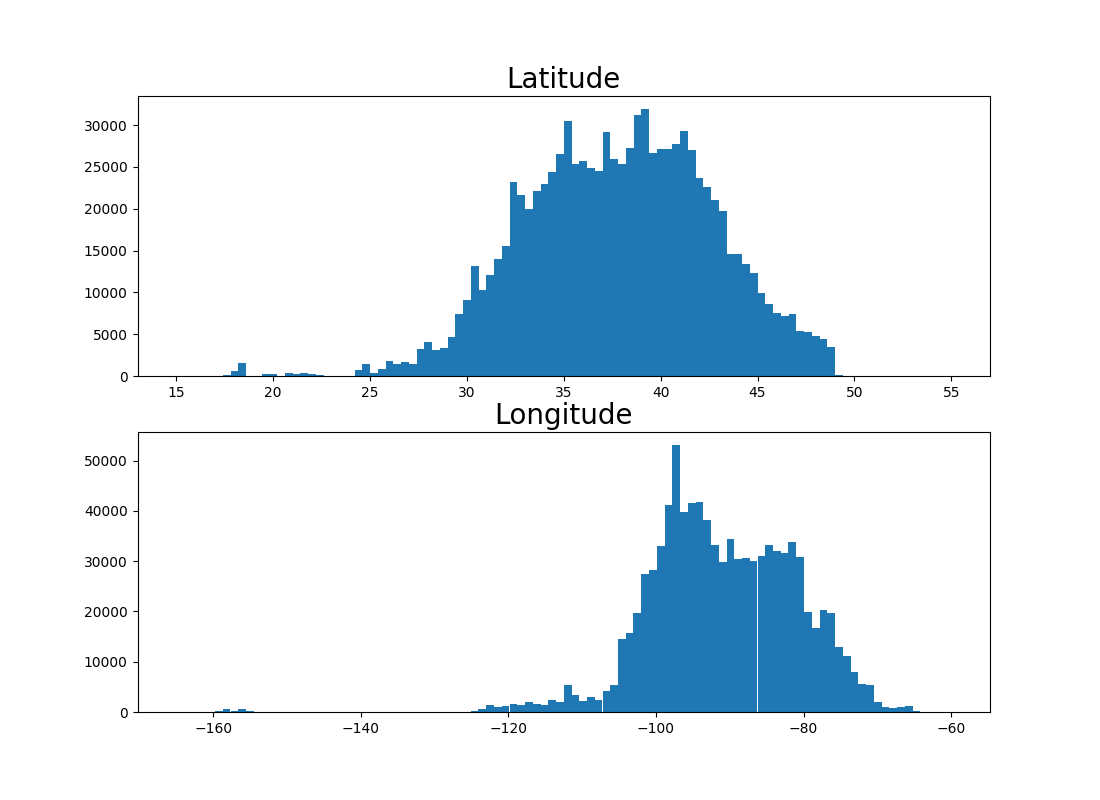

In [40]:
fig = plt.figure(figsize=(11, 8))
ax = fig.subplots(2)

ax[0].set_title('Latitude', fontsize=20)
ax[0].hist(data.BEGIN_LAT, bins=100, range=(15, 55))

ax[1].set_title('Longitude', fontsize=20)
ax[1].hist(data.BEGIN_LON, bins=100, range=(-165, -60))

plt.show()

# Yearly counts
<br>
The histogram looks very interesting and it has increasing form. <br>
<br>
One can think the events are getting more intensive year by year <br>
but in my own opinion it is just due to the data collection in past times and now. <br>
Surely the data is more now than then and we should correct this fact somehow in future <br>
(it can cause problems to the model) <br>
<br>

<IPython.core.display.Javascript object>


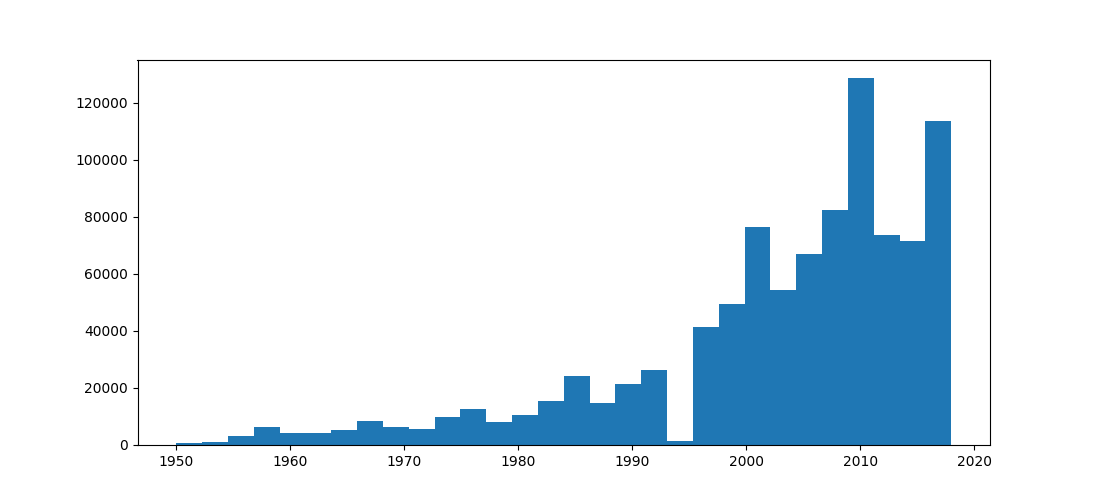

In [72]:
plt.figure(figsize=(11, 5))
plt.hist(data.BEGIN_YEARMONTH//100, bins=30)
plt.show()

# State's Events' Counts
<br>
Here you can clearly see what states have more events <br>
<br>

<IPython.core.display.Javascript object>


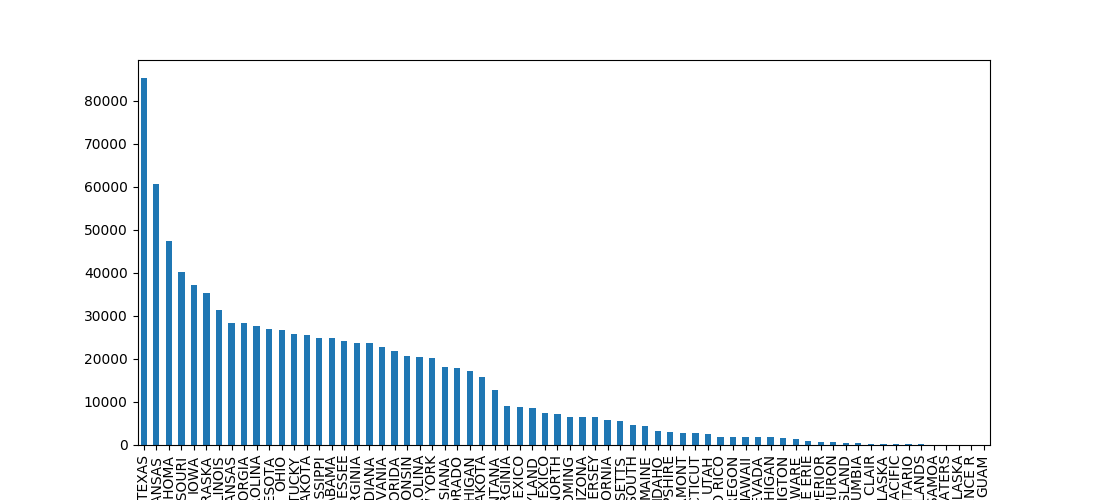

In [10]:
data.STATE.value_counts().plot(kind='bar', figsize=(11, 5))
plt.show()

# Event Types
<br>
Event Types' ditribution <br>
<br>

<IPython.core.display.Javascript object>


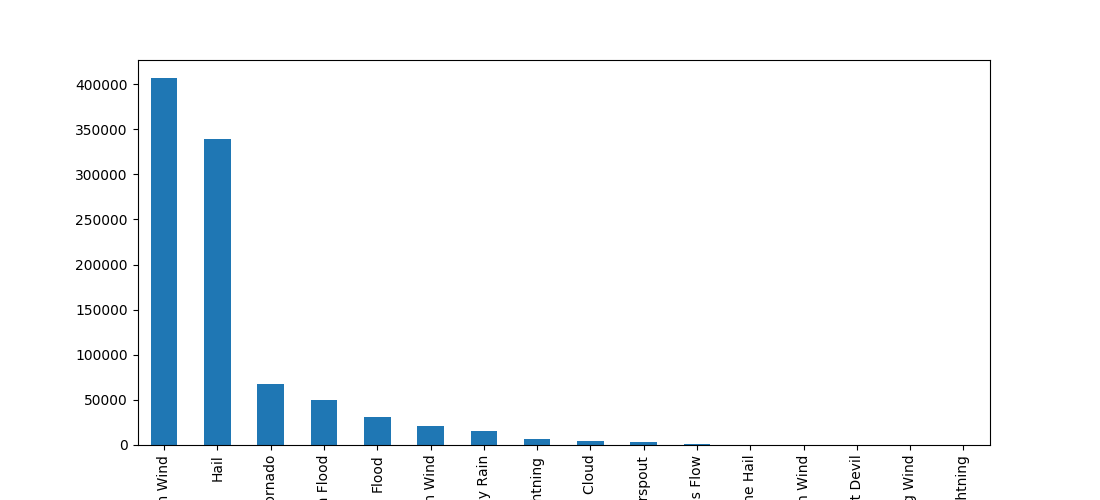

In [70]:
data.EVENT_TYPE.value_counts().plot(kind='bar', figsize=(11, 5))
plt.show()

# Problems
<br>
There is a problem with DAMAGE_PROPERTY and DAMAGE_CROPS columns. <br>
Their format(mentioned in the documentation) is not the same <br>
for all the instances and I should develop some function-parser <br>
that will understand every possible format case, <br>
so that the loss of the data will be low. <br>
<br>
You can see some initial function below, <br>
but it still don't understand all the cases, <br>
so I'll end it when I'll work with mentioned columns later. <br>
<br>

In [62]:
def convert_to_int(num_str):
    if not num_str or type(num_str)!=str:
        return None
    try:
        float(num_str[:-1])
    except ValueError:
        return None
    if num_str[-1]=='K' or num_str[-1]=='k':
        return float(num_str[:-1])*1000
    elif num_str[-1]=='M' or num_str[-1]=='m':
        return float(num_str[:-1])*1000000
    else:
        try:
            float(num_str)
        except ValueError:
            return None
        return float(num_str)*1000

# Bad situation with NaN-s
<br>
As you can remember, there are still a lot of columns containing NaN-s. <br>
<br>
This problem has two solutions: <br>
<hr>
1. We drop the column <br>
2. We replace the NaN-s somehow <br>
<hr> <br>
It is good practice to drop all the columns containing more than 50% NaN-s. <br>
(So we will drop MAGNITUDE_TYPE column with 70% NaN-s) <br>
<br>
It's easy to notice that FLOOD_CAUSE column value is NaN, <br>
if the EVENT_TYPE is not some kind of a flood, so it is not a problem. <br>
<br>
We will fill other NaN-containing columns(DAMAGE_PROPERTY, DAMAGE_CROPS, MAGNITUDE) <br>
with the major values or with some random value from their distribution. <br>
<br>